# 积分

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#符号积分" data-toc-modified-id="符号积分-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>符号积分</a></span></li><li><span><a href="#数值积分" data-toc-modified-id="数值积分-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数值积分</a></span><ul class="toc-item"><li><span><a href="#quad-函数" data-toc-modified-id="quad-函数-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>quad 函数</a></span></li><li><span><a href="#积分到无穷" data-toc-modified-id="积分到无穷-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>积分到无穷</a></span></li><li><span><a href="#双重积分" data-toc-modified-id="双重积分-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>双重积分</a></span></li></ul></li><li><span><a href="#采样点积分" data-toc-modified-id="采样点积分-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>采样点积分</a></span><ul class="toc-item"><li><span><a href="#使用-ufunc-进行积分" data-toc-modified-id="使用-ufunc-进行积分-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>使用 ufunc 进行积分</a></span></li><li><span><a href="#速度比较" data-toc-modified-id="速度比较-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>速度比较</a></span></li></ul></li></ul></div>

## 符号积分

积分与求导的关系：

$$\frac{d}{dx} F(x) = f(x)
\Rightarrow F(x) = \int f(x) dx$$

符号运算可以用 sympy 模块完成。

In [1]:
!pip2 install sympy

In [2]:
# 导入 init_printing 模块方便其显示
from sympy import init_printing
init_printing()

In [3]:
from sympy import symbols, integrate
import sympy

In [4]:
# 产生 x 和 y 两个符号变量，并进行运算：
x, y = symbols('x y')
sympy.sqrt(x ** 2 + y ** 2)

In [5]:
# 对于生成的符号变量 z，我们将其中的 x 利用 subs 方法替换为 3：
z = sympy.sqrt(x ** 2 + y ** 2)
z.subs(x, 3)

In [6]:
# 再替换y
z.subs(x, 3).subs(y, 4)

In [7]:
# 还可以从 sympy.abc 中导入现成的符号变量：
from sympy.abc import theta
y = sympy.sin(theta) ** 2
y

In [8]:
# 对 y 进行积分：
Y = integrate(y)

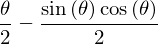

In [9]:
Y

In [11]:
# 计算 Y(π)−Y(0)：
import numpy as np
np.set_printoptions(precision=3)

Y.subs(theta, np.pi) - Y.subs(theta, 0)

计算:$\int_0^\pi y d\theta$

In [12]:
integrate(y, (theta, 0, sympy.pi))

In [13]:
# 查看具体数值可以使用 evalf() 方法
# 或者传入 numpy.pi，而不是 sympy.pi ：
integrate(y, (theta, 0, sympy.pi)).evalf()

In [14]:
integrate(y, (theta, 0, np.pi))

In [16]:
y

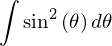

In [17]:
# 产生不定积分对象：
Y_indef = sympy.Integral(y)
Y_indef

In [19]:
print type(Y_indef)

<class 'sympy.integrals.integrals.Integral'>


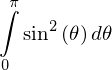

In [20]:
# 定积分：
Y_def = sympy.Integral(y, (theta, 0, sympy.pi))
Y_def

产生函数 $Y(x) = \int_0^x sin^2(\theta) d\theta$，并将其向量化

In [21]:
y

In [22]:
Y_raw = lambda x: integrate(y, (theta, 0, x))
Y = np.vectorize(Y_raw)

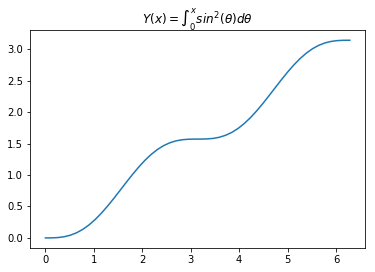

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
p = plt.plot(x, Y(x))
t = plt.title(r'$Y(x) = \int_0^x sin^2(\theta) d\theta$')

## 数值积分

数值积分：

$$F(x) = \lim_{n \rightarrow \infty} \sum_{i=0}^{n-1} f(x_i)(x_{i+1}-x_i) 
\Rightarrow F(x) = \int_{x_0}^{x_n} f(x) dx$$

In [28]:
# 导入贝塞尔函数：
from scipy.special import jv

In [29]:
def f(x):
    return jv(2.5, x)

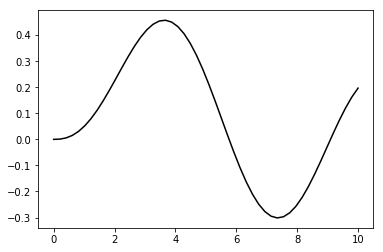

In [30]:
x = np.linspace(0, 10)
p = plt.plot(x, f(x), 'k-')

### quad 函数

In [31]:
# quad 返回一个 (积分值，误差) 组成的元组：
from scipy.integrate import quad
interval = [0, 6.5] # 给定自变量范围
value, max_err = quad(f, *interval)

In [32]:
# 积分值：
print value

1.28474297234


In [33]:
# 最大误差
print max_err

2.34181851396e-09


integral = 1.284742972
upper bound on error: 2.34e-09


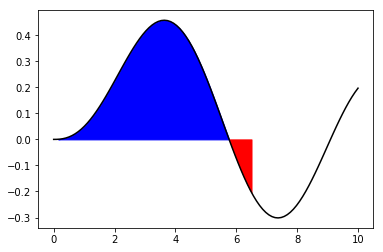

In [34]:
# 积分区间图示，蓝色为正，红色为负：
print "integral = {:.9f}".format(value)
print "upper bound on error: {:.2e}".format(max_err)

x = np.linspace(0, 10, 100)
p = plt.plot(x, f(x), 'k-')

x = np.linspace(0, 6.5, 45)
p = plt.fill_between(x, f(x), where=f(x)>0, color="blue")
p = plt.fill_between(x, f(x), where=f(x)<0, color="red", interpolate=True)

### 积分到无穷

In [35]:
from numpy import inf
interval = [0., inf]

def g(x):
    return np.exp(-x ** 1/2)

upper bound on error: 7.2e-11


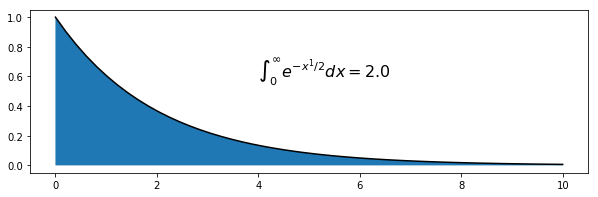

In [36]:
value, max_err = quad(g, *interval)
x = np.linspace(0, 10, 50)
fig = plt.figure(figsize=(10,3))

p = plt.plot(x, g(x), 'k-')
p = plt.fill_between(x, g(x))

plt.annotate(r"$\int_0^{\infty}e^{-x^1/2}dx = $" + "{}".format(value), (4, 0.6),
         fontsize=16)
print "upper bound on error: {:.1e}".format(max_err)

### 双重积分

假设我们要进行如下的积分：

$$I_n = \int \limits_0^{\infty} \int \limits_1^{\infty} \frac{e^{-xt}}{t^n}dt dx = \frac{1}{n}$$

In [37]:
def h(x, t, n):
    """core function, takes x, t, n"""
    return np.exp(-x * t) / (t ** n)

一种方式是调用两次 quad 函数，不过这里 quad 的返回值不能向量化，所以使用了修饰符 vectorize 将其向量化：

In [38]:
from numpy import vectorize
@vectorize
def int_h_dx(t, n):
    """Time integrand of h(x)."""
    return quad(h, 0, np.inf, args=(t, n))[0]

In [39]:
@vectorize
def I_n(n):
    return quad(int_h_dx, 1, np.inf, args=(n))

In [40]:
I_n([0.5, 1.0, 2.0, 5])

(array([2. , 1. , 0.5, 0.2]),
 array([4.507e-12, 4.340e-14, 5.551e-15, 2.220e-15]))

或者直接调用 dblquad 函数，并将积分参数传入，传入方式有多种，后传入的先进行积分：

In [41]:
from scipy.integrate import dblquad
@vectorize
def I(n):
    """Same as I_n, but using the built-in dblquad"""
    x_lower = 0
    x_upper = np.inf
    return dblquad(h,
                   lambda t_lower: 1, lambda t_upper: np.inf,
                   x_lower, x_upper, args=(n,))

In [42]:
I_n([0.5, 1.0, 2.0, 5])

(array([2. , 1. , 0.5, 0.2]),
 array([4.507e-12, 4.340e-14, 5.551e-15, 2.220e-15]))

## 采样点积分

In [43]:
# trapz 方法 和 simps 方法
from scipy.integrate import trapz, simps

In [44]:
# sin 函数， 100 个采样点和 5 个采样点：
x_s = np.linspace(0, np.pi, 5)
y_s = np.sin(x_s)
x = np.linspace(0, np.pi, 100)
y = np.sin(x)

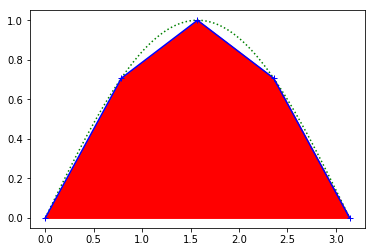

In [49]:
p = plt.plot(x,y,'k:',color='green')
p = plt.plot(x_s,y_s,"k+-",color="blue")
p = plt.fill_between(x_s,y_s,color="red")

In [50]:
# 采用 trapezoidal 方法 和 simpson 方法积分（函数积分为 2）：
result_s = trapz(y_s, x_s)
result_s_s = simps(y_s, x_s)
result = trapz(y, x)
print "Trapezoidal Integration over 5 points : {:.3f}".format(result_s)
print "Simpson Integration over 5 points : {:.3f}".format(result_s_s)
print "Trapezoidal Integration over 100 points : {:.3f}".format(result)

Trapezoidal Integration over 5 points : 1.896
Simpson Integration over 5 points : 2.005
Trapezoidal Integration over 100 points : 2.000


### 使用 ufunc 进行积分

In [51]:
# ufunc 对象：
type(np.add)

numpy.ufunc

In [54]:
np.add.accumulate??

```
add.accumulate() is equivalent to np.cumsum().
```

In [56]:
x = np.linspace(0, np.pi, 100)
y = np.sin(x)
y

array([0.000e+00, 3.173e-02, 6.342e-02, 9.506e-02, 1.266e-01, 1.580e-01,
       1.893e-01, 2.203e-01, 2.511e-01, 2.817e-01, 3.120e-01, 3.420e-01,
       3.717e-01, 4.009e-01, 4.298e-01, 4.582e-01, 4.862e-01, 5.137e-01,
       5.406e-01, 5.671e-01, 5.929e-01, 6.182e-01, 6.428e-01, 6.668e-01,
       6.901e-01, 7.127e-01, 7.346e-01, 7.557e-01, 7.761e-01, 7.958e-01,
       8.146e-01, 8.326e-01, 8.497e-01, 8.660e-01, 8.815e-01, 8.960e-01,
       9.096e-01, 9.224e-01, 9.341e-01, 9.450e-01, 9.549e-01, 9.638e-01,
       9.718e-01, 9.788e-01, 9.848e-01, 9.898e-01, 9.938e-01, 9.969e-01,
       9.989e-01, 9.999e-01, 9.999e-01, 9.989e-01, 9.969e-01, 9.938e-01,
       9.898e-01, 9.848e-01, 9.788e-01, 9.718e-01, 9.638e-01, 9.549e-01,
       9.450e-01, 9.341e-01, 9.224e-01, 9.096e-01, 8.960e-01, 8.815e-01,
       8.660e-01, 8.497e-01, 8.326e-01, 8.146e-01, 7.958e-01, 7.761e-01,
       7.557e-01, 7.346e-01, 7.127e-01, 6.901e-01, 6.668e-01, 6.428e-01,
       6.182e-01, 5.929e-01, 5.671e-01, 5.406e-01, 

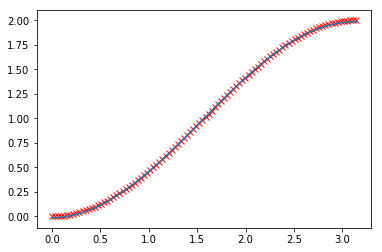

In [57]:
result_np = np.add.accumulate(y) * (x[1] - x[0]) - (x[1] - x[0]) / 2

p = plt.plot(x, - np.cos(x) + np.cos(0), 'rx')
p = plt.plot(x, result_np)

### 速度比较

计算积分：

$$\int_0^x sin \theta d\theta$$

In [58]:
import sympy
from sympy.abc import x, theta
sympy_x = x

In [59]:
x = np.linspace(0, 20 * np.pi, 1e+4)
y = np.sin(x)
sympy_y = vectorize(lambda x: sympy.integrate(sympy.sin(theta), (theta, 0, x)))

d:\python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [60]:
# numpy 方法：
%timeit np.add.accumulate(y) * (x[1] - x[0])
y0 = np.add.accumulate(y) * (x[1] - x[0])
print y0[-1] 

10000 loops, best of 3: 44.1 µs per loop
-2.3413804475641734e-17


In [68]:
# quad 方法：
%timeit quad(np.sin, 0, 20 * np.pi)
y2 = quad(np.sin, 0, 20 * np.pi, full_output=True)
print "result = ", y2[0]
print "number of evaluations", y2[-1]['neval']

10000 loops, best of 3: 20.7 µs per loop
 result =  3.43781337153e-15
number of evaluations 21


In [62]:
# trapz 方法：
%timeit trapz(y, x)
y1 = trapz(y, x)
print y1

10000 loops, best of 3: 68 µs per loop
-4.440892098500626e-16


In [63]:
# simps 方法：
%timeit simps(y, x)
y3 = simps(y, x)
print y3

1000 loops, best of 3: 299 µs per loop
3.284285549683824e-16


In [64]:
# sympy 积分方法：
%timeit sympy_y(20 * np.pi)
y4 = sympy_y(20 * np.pi)
print y4

100 loops, best of 3: 9.1 ms per loop
0
